# UKCOGS survey: analysis

Last updated: 30th June 2020

## Introduction

This notebook reproduces analysis presented in the paper

## Prepare data

In [1]:
## Libraries
library("xtable")
library("ggplot2")


In [2]:
mydta3 <- read.csv("200630-ukcogs-data.csv")
head(mydta3)

,X,ID,centre,name,staffreduced,staffJDCOVID,staffJDRedeploy,staffGOCOVID,staffGORedeploy,staffConstCOVID,⋯,pallcapred,gonvrred,mdtworkred,movepperlist,moveclinic,moveotheractivity,movenotyet,centralhub,minaccesssurg,newname
,<int>,<dbl>,<fct>,<fct>,<fct>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<int>,<int>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>
1,18,11593373277,Unit,site-1,No,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,NA,10,20,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,1
2,30,11555988746,Unit,site-2,No,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,0,10,20,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,2
3,55,11550243631,Centre,site-3,Yes,FALSE,TRUE,FALSE,FALSE,TRUE,⋯,NA,80,60,TRUE,FALSE,FALSE,NA,TRUE,TRUE,3
4,13,11593709116,Unit,site-4,No,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,0,70,50,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,4
5,22,11563796810,Centre,site-5,Yes,FALSE,TRUE,FALSE,TRUE,FALSE,⋯,0,0,50,TRUE,TRUE,NA,NA,TRUE,FALSE,5
6,9,11594652889,Centre,site-6,No,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,0,NA,0,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,6


# Analysis

## Summary of hospitals

In [3]:
##############
## Basic summaries

t.inc<-!duplicated(mydta3$newname)

mynumberresp <- tapply(mydta3$ID, mydta3$newname, length)

mydtasummary <- mydta3[t.inc,]

mysummary <- cbind( mydtasummary$name,mynumberresp,as.character(mydtasummary$centre))

mysummary <- mysummary[order(mysummary[,3], mysummary[,1], mysummary[,2]),]

colnames(mysummary) <- c("Site", "Number response", "Type")

rownames(mysummary) <- rep("", nrow(mysummary))

xtable(mysummary, align="llrc", include.rownames=FALSE)

table(mysummary[,2], mysummary[,3])


,Site,Number response,Type
,<fct>,<fct>,<fct>
X,10,1,Centre
X.1,13,1,Centre
X.2,15,1,Centre
X.3,16,2,Centre
X.4,18,1,Centre
X.5,19,1,Centre
X.6,20,3,Centre
X.7,23,1,Centre
X.8,24,2,Centre


   
    Centre Unit
  1     22   18
  2      6    1
  3      2    0
  4      1    0
  5      1    0

The sites that responded to the questionnaire are listed above, with information on the number of people who completed a form and site type (centre or unit).

In total there were 34 centres and 19 units

In [4]:
table(mysummary[,3])


Centre   Unit 
    32     19 

## Regarding staffing, have you experienced significant reduction in staff numbers?

In [5]:
################################################
## Discrepancy within some centre responses

##remove 11550771438 - not agreed with others
mydta3 <- mydta3[!(mydta3$ID==11550771438),]

##remove 11561304662 - not agreed with others
mydta3 <- mydta3[!(mydta3$ID==11561304662),]

##remove 11596521251 - not agreed with others
mydta3 <- mydta3[!(mydta3$ID==11596521251),]

##remove 11549791528 - not agreed with others
mydta3 <- mydta3[!(mydta3$ID==11549791528),]

Some centres had different answers regarding staffing reductions. 

In what follows we assumed that a site had seen a reduction in staffing if one respondant said their had been.

In [6]:
mystaffred <- tapply(as.character(mydta3$staffreduced), mydta3$newname, function(ind) mean(ind=="Yes"))

##centres staff reduced
centre.red <- mydta3$newname %in% names(mystaffred)[mystaffred>0]

mydta4a <- mydta3[centre.red,]

mydta4a$newname <- as.factor(as.character(mydta4a$newname))

mydta4b <- mydta3[!centre.red,c(1,2,3,4,5,18:41)]
                     
mydta4b$newname <- as.factor(as.character(mydta4b$newname))
                    
## Write CSV files for to separate by sites that saw a reduction and those that did not
write.csv(mydta4a, file="output/staffred-all.csv")

write.csv(mydta4b, file="output/staffOK-all.csv")

## summary unit / centre
mydta4au <- mydta4a[!duplicated(mydta4a$newname),]
                     
mydta4bu <- mydta4b[!duplicated(mydta4b$newname),]

print("Centre / Units with reduction in staff")                     

mydta4au$name                     

print("Centre / Units with NO reduction in staff")                     

mydta4bu$name                     
                     
print("== summary ==")                     
                     
print("Centre / Units with reduction in staff")                     
                     
table(mydta4au$centre)

print("Centre / Units with NO reduction in staff")    
                     
table(mydta4bu$centre)              

[1] "Centre / Units with reduction in staff"


[1] site-3  site-5  site-10 site-11 site-20 site-25 site-28 site-31 site-32
[10] site-33 site-36 site-38 site-43 site-44 site-46 site-50 site-53 site-55
[19] site-56 site-58 site-60 site-61 site-63 site-68 site-69
69 Levels: site-1 site-10 site-11 site-12 site-13 site-14 site-15 ... site-9

[1] "Centre / Units with NO reduction in staff"


[1] site-1  site-2  site-4  site-6  site-9  site-13 site-18 site-19 site-21
[10] site-22 site-23 site-26 site-34 site-35 site-39 site-40 site-42 site-45
[19] site-51 site-57 site-59 site-62 site-64 site-65 site-66 site-67
69 Levels: site-1 site-10 site-11 site-12 site-13 site-14 site-15 ... site-9

[1] "== summary =="
[1] "Centre / Units with reduction in staff"



Centre   Unit 
    17      8 

[1] "Centre / Units with NO reduction in staff"



Centre   Unit 
    15     11 

In [7]:
## Summary statistics. Take average within centre

fn.sumstat.bin <- function(ind){
    min(sum(ind),1, na.rm=TRUE) 
}
       
## do opposite - sensititivty analysis
##fn.sumstat.bin <- function(ind){
##    floor(mean(ind, na.rm=TRUE)) 
##}
       
mydta5a1 <- data.frame(sapply(6:13, function(idx) tapply(mydta4a[,idx], mydta4a$newname, fn.sumstat.bin)))

mydta5a2 <- data.frame(sapply(14:17, function(idx) tapply(mydta4a[,idx], mydta4a$newname, mean, na.rm=TRUE)))

mydta5a <- cbind(mydta5a1, mydta5a2)

colnames(mydta5a) <- colnames(mydta4a[,6:17])

## output CSV file with data                              
write.csv(mydta5a, file="output/staffred-summarybycentre.csv")

##Look at individual results                              
mydta5a 

,staffJDCOVID,staffJDRedeploy,staffGOCOVID,staffGORedeploy,staffConstCOVID,staffConstRedeploy,staffCNSCOVID,staffCNSRedeploy,staffJDred,staffGOred,staffCONred,staffCNSred
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13,0,0,0,0,1,0,0,0,NaN,NaN,25.0,NaN
17,1,0,0,0,1,0,0,0,15.0,NaN,50.0,NaN
19,1,1,0,1,0,0,0,0,25.0,100,17.0,NaN
20,0,1,0,1,0,0,0,0,100.0,100,0.0,0.0
21,1,0,0,0,1,0,1,1,30.0,NaN,30.0,80.0
22,1,0,1,0,1,0,0,1,100.0,100,70.0,30.0
24,1,0,0,0,1,0,0,0,15.0,0,50.0,0.0
26,1,0,1,0,1,0,1,0,30.0,100,20.0,20.0
3,0,1,0,0,1,0,0,1,60.0,0,20.0,30.0


In [8]:
mysum.staffred <- list(summary(mydta5a$staffJDred),
                       summary(mydta5a$staffGOred),
                       summary(mydta5a$staffCONred),
                       summary(mydta5a$staffCNSred))

myna.staffred <- unlist(lapply(mysum.staffred, function(ind) ind[7]))

##mylabname <- paste(c("Junior", "Gyn Onc", "Consultant", "CNS"), "\n (NA=", myna.staffred, ")", sep="")

##boxplot(list(mydta5a$staffJDred, mydta5a$staffGOred, mydta5a$staffCONred, mydta5a$staffCNSred), names=mylabname, ylab="Percentage reduction (%)")


mylabname <- paste(c("Junior", "Gyn Onc", "Consultant", "CNS"), "\n (NA=", myna.staffred, ")", sep="")


fn.format<-function(ind, ndigit=2)
{
    format(round(ind,ndigit), nsmall=ndigit)
}

fn.sumstat1 <- function(ind, ndig=0){
        paste(sum(ind), " (", fn.format(round(sum(ind)/length(ind) * 100),ndig), "%)", sep="") 
}

                               
fn.summaryyes <- function(inyes1, inyes2, inperc){
    print(paste("Number yes Covid: ", sum(inyes1), "/", length(inyes1), " (", fn.format(sum(inyes1)/length(inyes1)*100,0), "%)", sep=""))
    print(paste("Number yes redeploy: ", sum(inyes2), "/", length(inyes2), " (", fn.format(sum(inyes2)/length(inyes2)*100,0), "%)", sep=""))
    print("cross tab")
    COVID<-inyes1; REDEPLOY <- inyes2
    print(addmargins(table(COVID, REDEPLOY)))

    print("individual responses: percentage reduction")
    print(sort(inperc[inyes1==1 | inyes2==1], na.last=TRUE))
    print("summary: percentage reduction")
    summary(inperc[inyes1==1 | inyes2==1])
    }

print("== Junior doctors ==")
fn.summaryyes(mydta5a$staffJDCOVID,mydta5a$staffJDRedeploy, mydta5a$staffJDred)

print("== GO Sub-specialty Trainee == ")
fn.summaryyes(mydta5a$staffGOCOVID, mydta5a$staffGORedeploy, mydta5a$staffGOred)

print("== Consultant ==")
fn.summaryyes(mydta5a$staffConstCOVID,mydta5a$staffConstRedeploy, mydta5a$staffCONred)

print("== CNS ==")
fn.summaryyes(mydta5a$staffCNSCOVID,mydta5a$staffCNSRedeploy, mydta5a$staffCNSred)



[1] "== Junior doctors =="
[1] "Number yes Covid: 14/25 (56%)"
[1] "Number yes redeploy: 14/25 (56%)"
[1] "cross tab"
     REDEPLOY
COVID  0  1 Sum
  0    3  8  11
  1    8  6  14
  Sum 11 14  25
[1] "individual responses: percentage reduction"
 [1]  10.0  15.0  15.0  20.0  22.5  25.0  25.0  30.0  30.0  40.0  40.0  40.0
[13]  40.0  50.0  60.0 100.0 100.0 100.0 100.0 100.0 100.0   NaN
[1] "summary: percentage reduction"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   10.0    25.0    40.0    50.6   100.0   100.0       1 

[1] "== GO Sub-specialty Trainee == "
[1] "Number yes Covid: 2/25 (8%)"
[1] "Number yes redeploy: 6/25 (24%)"
[1] "cross tab"
     REDEPLOY
COVID  0  1 Sum
  0   17  6  23
  1    2  0   2
  Sum 19  6  25
[1] "individual responses: percentage reduction"
[1]  30 100 100 100 100 100 100 100
[1] "summary: percentage reduction"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  30.00  100.00  100.00   91.25  100.00  100.00 

[1] "== Consultant =="
[1] "Number yes Covid: 17/25 (68%)"
[1] "Number yes redeploy: 2/25 (8%)"
[1] "cross tab"
     REDEPLOY
COVID  0  1 Sum
  0    6  2   8
  1   17  0  17
  Sum 23  2  25
[1] "individual responses: percentage reduction"
 [1]  0.0  1.0 16.5 20.0 20.0 20.0 20.0 25.0 25.0 30.0 30.0 30.0 33.0 40.0 50.0
[16] 50.0 50.0 70.0  NaN
[1] "summary: percentage reduction"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   20.00   27.50   29.47   38.25   70.00       1 

[1] "== CNS =="
[1] "Number yes Covid: 9/25 (36%)"
[1] "Number yes redeploy: 14/25 (56%)"
[1] "cross tab"
     REDEPLOY
COVID  0  1 Sum
  0    9  7  16
  1    2  7   9
  Sum 11 14  25
[1] "individual responses: percentage reduction"
 [1]  1.0 16.5 20.0 20.0 20.0 25.0 30.0 30.0 40.0 50.0 50.0 62.5 75.0 80.0  NaN
[16]  NaN
[1] "summary: percentage reduction"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00   20.00   30.00   37.14   50.00   80.00       2 

Warning message:
“Removed 26 rows containing non-finite values (stat_boxplot).”
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 26 rows containing non-finite values (stat_bindot).”


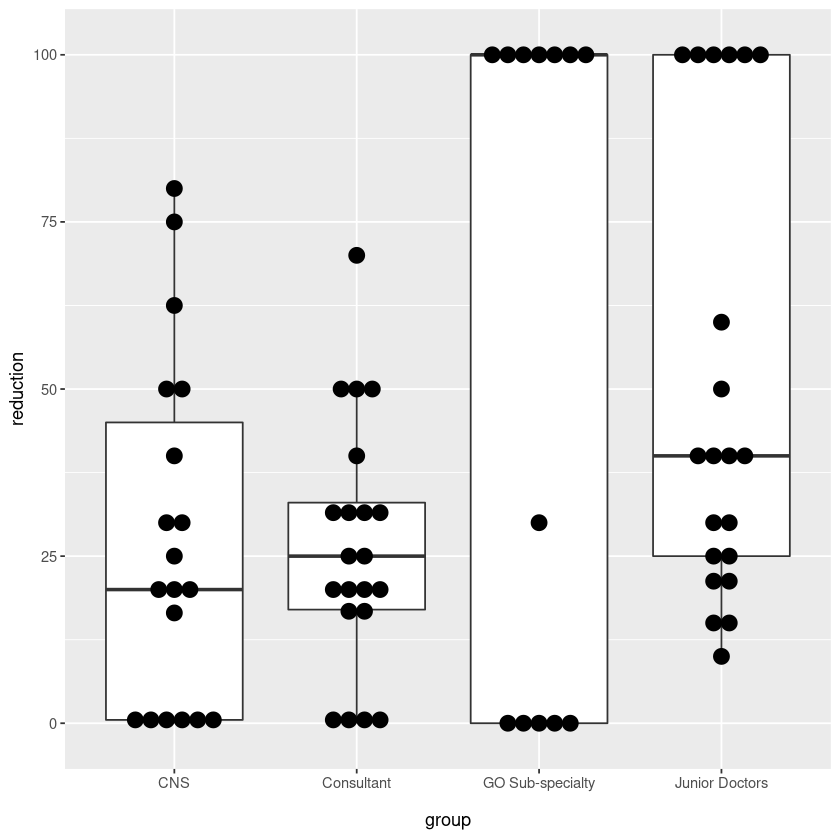

In [9]:
mygplotdta <- data.frame(reduction=c(mydta5a$staffJDred,mydta5a$staffGOred, mydta5a$staffCONred, mydta5a$staffCNSred), group=rep(c("Junior Doctors", "GO Sub-specialty", "Consultant\
", "CNS"), each=nrow(mydta5a)))

##mygplotdta[is.na(mygplotdta[,1]),1] <- 0

p <- ggplot(mygplotdta, aes(x=group, y=reduction)) +
    geom_boxplot()+
  geom_dotplot(binaxis='y', stackdir='center', dotsize=.7)

p

## sub group                                                                                                                                                                         
#mygplotdta1 <- data.frame(reduction=c(mydta5a1$staffJDred,mydta5a1$staffGOred, mydta5a1$staffCONred, mydta5a1$staffCNSred), group=rep(c("Junior Doctors (Unit)", "GO Sub-specialty (Unit)", "Consultant (Unit)", "CNS (Unit)"), each=nrow(mydta5a1)))

#mygplotdta0 <- data.frame(reduction=c(mydta5a0$staffJDred,mydta5a0$staffGOred, mydta5a0$staffCONred, mydta5a0$staffCNSred), group=rep(c("Junior Doctors (Centre)", "GO Sub-specialty (Centre)", "Consultant (Centre)", "CNS (Centre)"), each=nrow(mydta5a0)))

#mygplotdta01<-rbind(mygplotdta0, mygplotdta1)
#mygplotdta01  <-  mygplotdta01[order(as.character(mygplotdta01$group)),]
#mygplotdta01$group <- factor(as.character(mygplotdta01$group))

In [10]:
########################                                                                                                                                                             
## centres vs units                                                                                                                                                                          
##########################                                                                                                                                                           
myord <- order(mydta4a$newname[!duplicated(mydta4a$newname)])
t.inc <- mydta4a$centre[!duplicated(mydta4a$newname)][myord]=="Centre"
mydta5a0 <- mydta5a[t.inc,]
mydta5a1 <- mydta5a[!t.inc,]
print("== Junior doctors ==")
print("= Unit =")
fn.summaryyes(mydta5a1$staffJDCOVID,mydta5a1$staffJDRedeploy, mydta5a1$staffJDred)
print("= Centre =")
fn.summaryyes(mydta5a0$staffJDCOVID,mydta5a0$staffJDRedeploy, mydta5a0$staffJDred)

print("== GO Sub-specialty Trainee == ")
print("= Unit =")
fn.summaryyes(mydta5a1$staffGOCOVID, mydta5a1$staffGORedeploy, mydta5a1$staffGOred)
print("= Centre =")
fn.summaryyes(mydta5a0$staffGOCOVID, mydta5a0$staffGORedeploy, mydta5a0$staffGOred)

print("== Consultant ==")
print("= Unit =")
fn.summaryyes(mydta5a1$staffGOCOVID,mydta5a1$staffGORedeploy, mydta5a1$staffGOred)
print("= Centre =")
fn.summaryyes(mydta5a0$staffGOCOVID,mydta5a0$staffGORedeploy, mydta5a0$staffGOred)
print("== CNS ==")
print("= Unit =")
fn.summaryyes(mydta5a1$staffCNSCOVID,mydta5a1$staffCNSRedeploy, mydta5a1$staffCNSred)
print("= Centre =")
fn.summaryyes(mydta5a0$staffCNSCOVID,mydta5a0$staffCNSRedeploy, mydta5a0$staffCNSred)


[1] "== Junior doctors =="
[1] "= Unit ="
[1] "Number yes Covid: 5/8 (62%)"
[1] "Number yes redeploy: 4/8 (50%)"
[1] "cross tab"
     REDEPLOY
COVID 0 1 Sum
  0   2 1   3
  1   2 3   5
  Sum 4 4   8
[1] "individual responses: percentage reduction"
[1]  10  25  30  40  40 NaN
[1] "summary: percentage reduction"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
     10      25      30      29      40      40       1 

[1] "= Centre ="
[1] "Number yes Covid: 9/17 (53%)"
[1] "Number yes redeploy: 10/17 (59%)"
[1] "cross tab"
     REDEPLOY
COVID  0  1 Sum
  0    1  7   8
  1    6  3   9
  Sum  7 10  17
[1] "individual responses: percentage reduction"
 [1]  15.0  15.0  20.0  22.5  25.0  30.0  40.0  40.0  50.0  60.0 100.0 100.0
[13] 100.0 100.0 100.0 100.0
[1] "summary: percentage reduction"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   24.38   45.00   57.34  100.00  100.00 

[1] "== GO Sub-specialty Trainee == "
[1] "= Unit ="
[1] "Number yes Covid: 0/8 (0%)"
[1] "Number yes redeploy: 1/8 (12%)"
[1] "cross tab"
     REDEPLOY
COVID 0 1 Sum
  0   7 1   8
  Sum 7 1   8
[1] "individual responses: percentage reduction"
[1] 30
[1] "summary: percentage reduction"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     30      30      30      30      30      30 

[1] "= Centre ="
[1] "Number yes Covid: 2/17 (12%)"
[1] "Number yes redeploy: 5/17 (29%)"
[1] "cross tab"
     REDEPLOY
COVID  0  1 Sum
  0   10  5  15
  1    2  0   2
  Sum 12  5  17
[1] "individual responses: percentage reduction"
[1] 100 100 100 100 100 100 100
[1] "summary: percentage reduction"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    100     100     100     100     100     100 

[1] "== Consultant =="
[1] "= Unit ="
[1] "Number yes Covid: 0/8 (0%)"
[1] "Number yes redeploy: 1/8 (12%)"
[1] "cross tab"
     REDEPLOY
COVID 0 1 Sum
  0   7 1   8
  Sum 7 1   8
[1] "individual responses: percentage reduction"
[1] 30
[1] "summary: percentage reduction"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     30      30      30      30      30      30 

[1] "= Centre ="
[1] "Number yes Covid: 2/17 (12%)"
[1] "Number yes redeploy: 5/17 (29%)"
[1] "cross tab"
     REDEPLOY
COVID  0  1 Sum
  0   10  5  15
  1    2  0   2
  Sum 12  5  17
[1] "individual responses: percentage reduction"
[1] 100 100 100 100 100 100 100
[1] "summary: percentage reduction"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    100     100     100     100     100     100 

[1] "== CNS =="
[1] "= Unit ="
[1] "Number yes Covid: 4/8 (50%)"
[1] "Number yes redeploy: 6/8 (75%)"
[1] "cross tab"
     REDEPLOY
COVID 0 1 Sum
  0   1 3   4
  1   1 3   4
  Sum 2 6   8
[1] "individual responses: percentage reduction"
[1]  20  20  40  50  80 NaN NaN
[1] "summary: percentage reduction"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
     20      20      40      42      50      80       2 

[1] "= Centre ="
[1] "Number yes Covid: 5/17 (29%)"
[1] "Number yes redeploy: 8/17 (47%)"
[1] "cross tab"
     REDEPLOY
COVID  0  1 Sum
  0    8  4  12
  1    1  4   5
  Sum  9  8  17
[1] "individual responses: percentage reduction"
[1]  1.0 16.5 20.0 25.0 30.0 30.0 50.0 62.5 75.0
[1] "summary: percentage reduction"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   20.00   30.00   34.44   50.00   75.00 

Warning message:
“Removed 26 rows containing non-finite values (stat_boxplot).”
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 26 rows containing non-finite values (stat_bindot).”


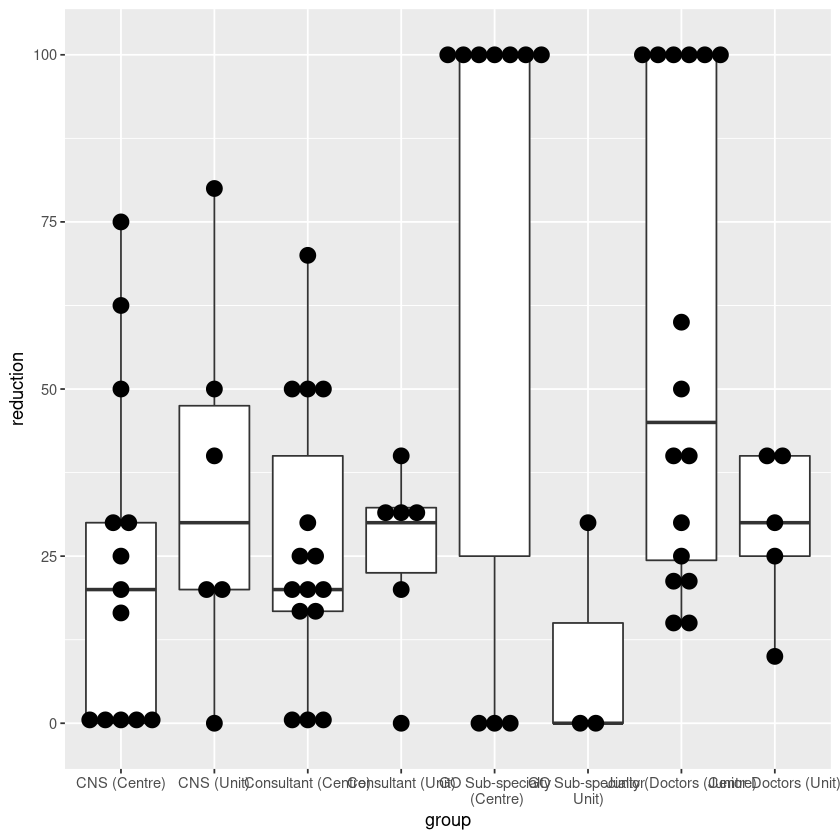

In [11]:
# sub group                                                                                                                                                                         
mygplotdta1 <- data.frame(reduction=c(mydta5a1$staffJDred,mydta5a1$staffGOred, mydta5a1$staffCONred, mydta5a1$staffCNSred), group=rep(c("Junior Doctors (Unit)", "GO Sub-specialty (\
Unit)", "Consultant (Unit)", "CNS (Unit)"), each=nrow(mydta5a1)))

mygplotdta0 <- data.frame(reduction=c(mydta5a0$staffJDred,mydta5a0$staffGOred, mydta5a0$staffCONred, mydta5a0$staffCNSred), group=rep(c("Junior Doctors (Centre)", "GO Sub-specialty\
 (Centre)", "Consultant (Centre)", "CNS (Centre)"), each=nrow(mydta5a0)))


mygplotdta01<-rbind(mygplotdta0, mygplotdta1)
mygplotdta01  <-  mygplotdta01[order(as.character(mygplotdta01$group)),]
mygplotdta01$group <- factor(as.character(mygplotdta01$group))

p <- ggplot(mygplotdta01, aes(x=group, y=reduction)) +
    geom_boxplot()+
  geom_dotplot(binaxis='y', stackdir='center', dotsize=.7)

p


## MDT changes

In [12]:
mymdtchange <- tapply(as.character(mydta3$MDTchange), mydta3$newname, function(ind) mean(ind=="Yes"))

print(paste("Number centres with change to MDT:", sum(mymdtchange), "/", length(mymdtchange)))

mycentre <- tapply(mydta3$centre, mydta3$newname, function(ind) ind[1])

mymdtchangevirtual <- tapply(mydta3$MDTvirual, mydta3$newname, mean) >0.1

mymdtchangevirtualF2F <- tapply(mydta3$MDTvirualF2F, mydta3$newname, mean) >0.1

mymdtchangesuspend <- tapply(mydta3$MDTsuspend, mydta3$newname, mean) >0.1

mymdtchangeMDTlessfreq <- tapply(mydta3$MDTlessfreq, mydta3$newname, mean) >0.1

mymdtchangeMDTlessattd <- tapply(mydta3$MDTlessattd, mydta3$newname, mean) >0

##sensitivity analysis -- opposite                   
##mymdtchangevirtual <- tapply(mydta3$MDTvirual, mydta3$newname, mean) == 1

##mymdtchangevirtualF2F <- tapply(mydta3$MDTvirualF2F, mydta3$newname, mean) == 1

##mymdtchangesuspend <- tapply(mydta3$MDTsuspend, mydta3$newname, mean) == 1

##mymdtchangeMDTlessfreq <- tapply(mydta3$MDTlessfreq, mydta3$newname, mean) == 1

##mymdtchangeMDTlessattd <- tapply(mydta3$MDTlessattd, mydta3$newname, mean) == 1                  
                   
mysumdtaMDT <- data.frame(centre=mycentre, virtual=mymdtchangevirtual, virtualF2F=mymdtchangevirtualF2F, suspend=mymdtchangesuspend, lessfreq=mymdtchangeMDTlessfreq, lessattd=mymdtchangeMDTlessattd)

fn.sumstatMDT1 <- function(mysumdtaMDT){

    paste(fn.format(colSums(mysumdtaMDT)[2:6],0), "/", nrow(mysumdtaMDT), " (",
          fn.format(colMeans(mysumdtaMDT)[2:6]*100,0), "%)", sep="")

}
                  
mysumMDT.all <- cbind(c("Virtual MDT", "Mixed virual F2F", "Less freq", "Suspend", "Less Attd"), fn.sumstatMDT1(mysumdtaMDT))

##unit                                                                                                                                                                               
mysumdtaMDT.unit <- mysumdtaMDT[mysumdtaMDT$centre==2,]

mysumMDT.unit <- cbind(c("Virtual MDT", "Mixed virual F2F", "Less freq", "Suspend", "Less Attd"), fn.sumstatMDT1(mysumdtaMDT.unit))

##centre                                                                                                                                                                             
mysumdtaMDT.centre <- mysumdtaMDT[mysumdtaMDT$centre==1,]

mysumMDT.centre <- cbind(c("Virtual MDT", "Mixed virual F2F", "Less freq", "Suspend", "Less Attd"), fn.sumstatMDT1(mysumdtaMDT.centre))

mysumMDT.sum <- cbind(mysumMDT.all, mysumMDT.unit[,2], mysumMDT.centre[,2])

colnames(mysumMDT.sum) <- c("Type", "All", "Unit", "Centre")

mysumMDT.sum


[1] "Number centres with change to MDT: 51 / 51"


Type,All,Unit,Centre
Virtual MDT,20/51 (39%),5/19 (26%),15/32 (47%)
Mixed virual F2F,33/51 (65%),13/19 (68%),20/32 (62%)
Less freq,0/51 ( 0%),0/19 ( 0%),0/32 ( 0%)
Suspend,0/51 ( 0%),0/19 ( 0%),0/32 ( 0%)
Less Attd,21/51 (41%),6/19 (32%),15/32 (47%)


[1] 0.9803922

$Centre
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.00   15.00   24.35   50.00   75.00       5 

$Unit
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   9.438  17.000  50.000       3 


Warning message:
“Removed 8 rows containing non-finite values (stat_boxplot).”
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 8 rows containing non-finite values (stat_bindot).”


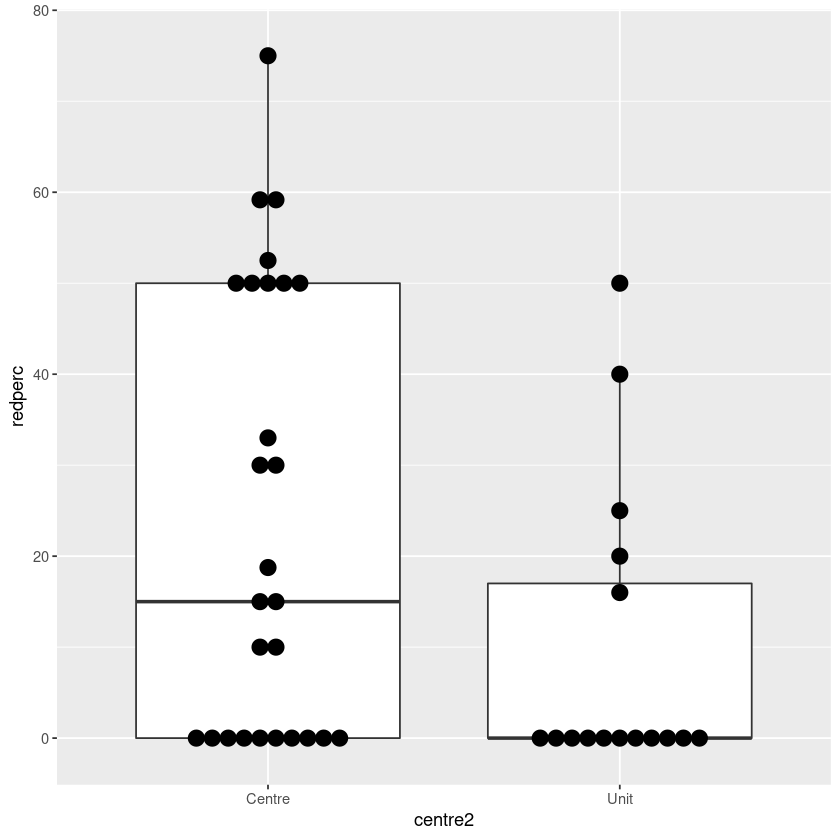

In [13]:
#### reduced percentage attendees                                                                                                                                                             
mysumdtaMDT$redperc <- tapply(mydta3$redperc, mydta3$newname, mean, na.rm=TRUE)
mysumdtaMDT$centre2<-as.factor(c("Centre", "Unit")[mysumdtaMDT$centre])
mean(rowSums(mysumdtaMDT[,2:6])>0)

p <- ggplot(mysumdtaMDT, aes(x=centre2, y=redperc)) +
    geom_boxplot()+
  geom_dotplot(binaxis='y', stackdir='center', dotsize=.7)

tapply(mysumdtaMDT$redperc, mysumdtaMDT$centre2, summary)
p

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing non-finite values (stat_bindot).”


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   2.00   50.00   75.00   66.37   87.50   95.00       2 

$Centre
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  25.00   50.00   74.38   68.51   86.88   95.00       2 

$Unit
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2      50      75      63      85      95 


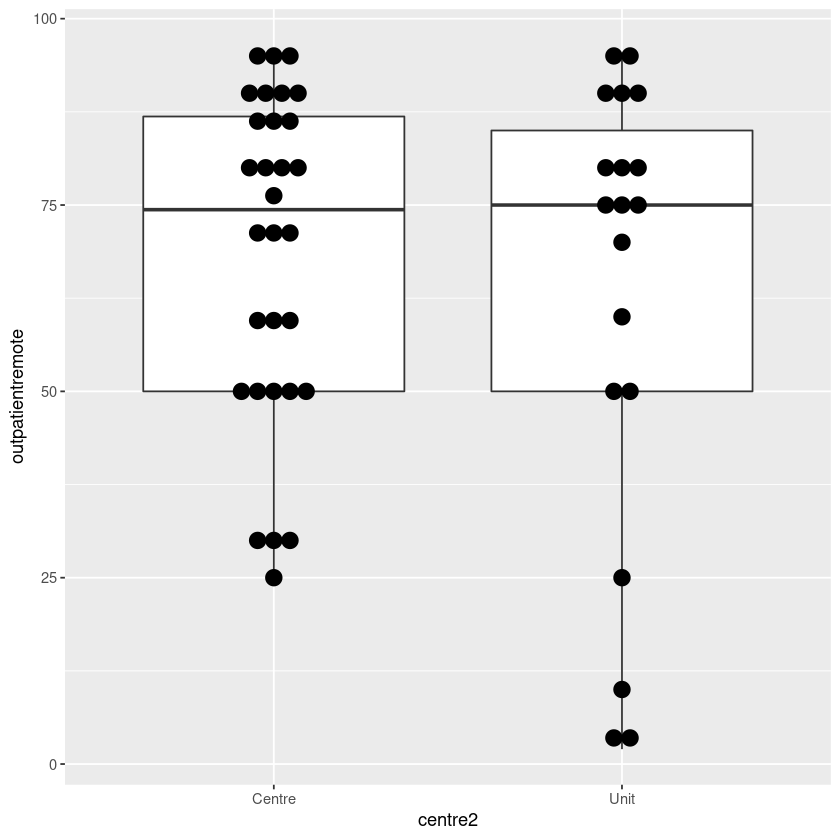

In [14]:
##What proportion of your out-patient clinic is remote consultation (telephone/ video)                                                                                               

mysumdtaMDT$outpatientremote <- tapply(mydta3$outpatientremote, mydta3$newname, mean, na.rm=TRUE)

p <- ggplot(mysumdtaMDT, aes(x=centre2, y=outpatientremote)) +
    geom_boxplot()+
  geom_dotplot(binaxis='y', stackdir='center', dotsize=.7)

p

summary(mysumdtaMDT$outpatientremote)

tapply(mysumdtaMDT$outpatientremote, mysumdtaMDT$centre2, summary)

### Re theatre time, how much reduction in theatre time has occurred? (If not reduced enter '0') 

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”


[1] "Summary overall"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   20.00   40.00   43.62   70.00  100.00       6 

[1] "By centre / unit"


$Centre
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   12.50   30.00   34.64   55.00   92.00       5 

$Unit
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   32.50   60.00   57.08   87.50  100.00       1 


Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”


png 
  2

Warning message in wilcox.test.default(split(mysumdtaMDT$theatrered, mysumdtaMDT$centre2)[[1]], :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  split(mysumdtaMDT$theatrered, mysumdtaMDT$centre2)[[1]] and split(mysumdtaMDT$theatrered, mysumdtaMDT$centre2)[[2]]
W = 145, p-value = 0.02314
alternative hypothesis: true location shift is not equal to 0


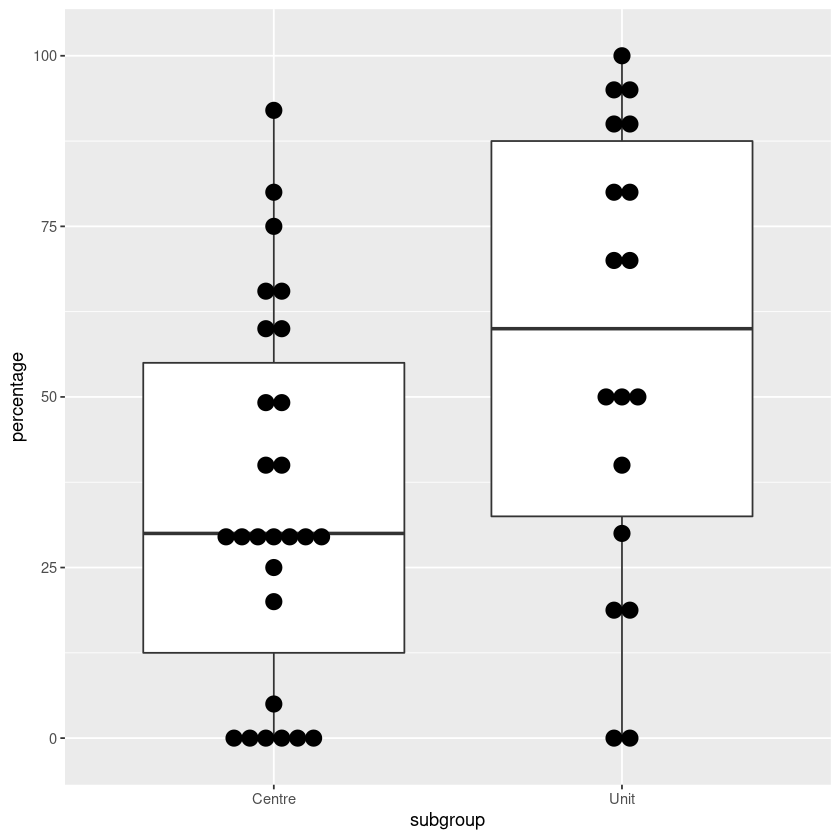

In [15]:
fn.sumpercavg <- function(colidx){

    thisstat <- tapply(mydta3[,colidx], mydta3$newname, mean, na.rm=TRUE)

    return(thisstat)

    }

fn.summarystat <- function(percentage, subgroup){
    p <- ggplot(mysumdtaMDT, aes(x=subgroup, y=percentage)) +
        geom_boxplot()+
        geom_dotplot(binaxis='y', stackdir='center', dotsize=.7)


    thissum <- summary(percentage)

    thissum2 <- tapply(percentage, subgroup, summary)

    return(list(p, thissum, thissum2))
    
}

mysumdtaMDT$theatrered <- fn.sumpercavg(26)

stat.theatrered <- fn.summarystat(mysumdtaMDT$theatrered, mysumdtaMDT$centre2)

stat.theatrered[[1]]

print("Summary overall")

stat.theatrered[[2]]

print("By centre / unit")

stat.theatrered[[3]]

 p <- ggplot(mysumdtaMDT, aes(x=centre2, y=theatrered)) +
        geom_boxplot()+
        geom_dotplot(binaxis='y', stackdir='center', dotsize=.7) +
        xlab("Site type")+
        ylab("Percentage reduced (%)")

tiff("output/theatretimereduced.tiff", units="in", width=5, height=5, res=200)
p
dev.off()

wilcox.test(split(mysumdtaMDT$theatrered,mysumdtaMDT$centre2)[[1]],split(mysumdtaMDT$theatrered,mysumdtaMDT$centre2)[[2]])

### What is the proportion of surgical cases postponed (if no cases postponed, enter ‘0’)

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 9 rows containing non-finite values (stat_bindot).”


[1] "Overall"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   16.25   30.00   37.54   56.75  100.00       9 

[1] "Centre / Unit"


$Centre
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   16.25   30.00   35.06   50.00  100.00       6 

$Unit
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   16.25   35.00   41.56   72.50  100.00       3 


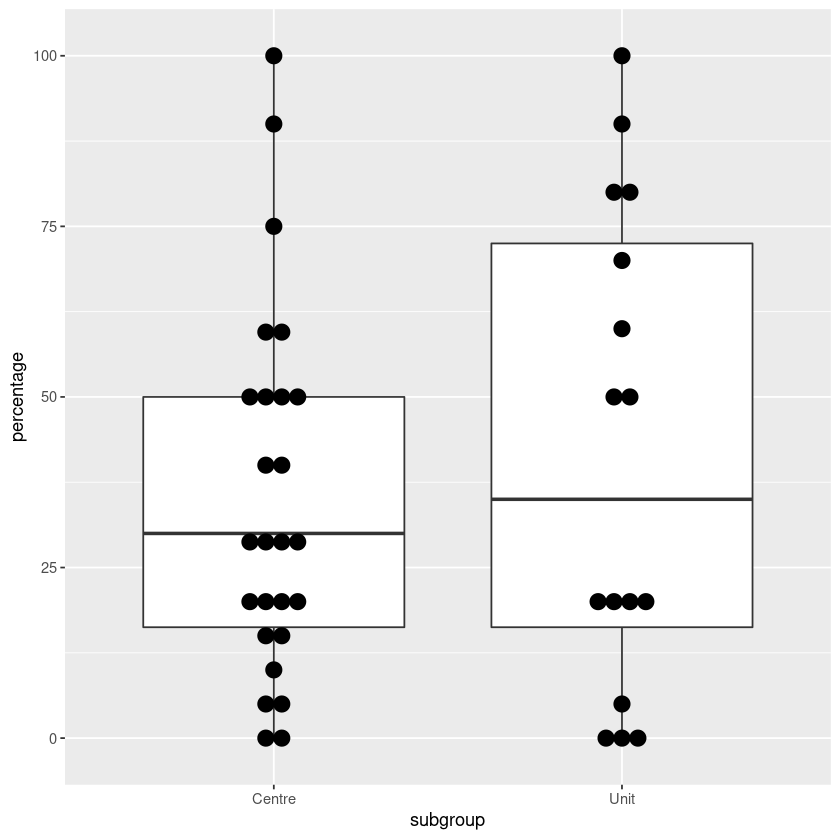

In [16]:
mysumdtaMDT$surgcasered <- fn.sumpercavg(27)

stat.surgcasered <- fn.summarystat(mysumdtaMDT$surgcasered, mysumdtaMDT$centre2)

stat.surgcasered[[1]]

print("Overall")

stat.surgcasered[[2]]

print("Centre / Unit")

stat.surgcasered[[3]]


### Re Medical Oncology access/capacity, how much is this reduced by? (If not reduced enter '0', If unknown enter NK)

Warning message:
“Removed 28 rows containing non-finite values (stat_boxplot).”
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 28 rows containing non-finite values (stat_bindot).”


[1] "Overall"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.00    0.00   10.14    0.00   90.00      28 

[1] "Centre / Unit"


$Centre
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.00    0.00   14.10   13.33   90.00      19 

$Unit
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      0       0       0       5       0      50       9 


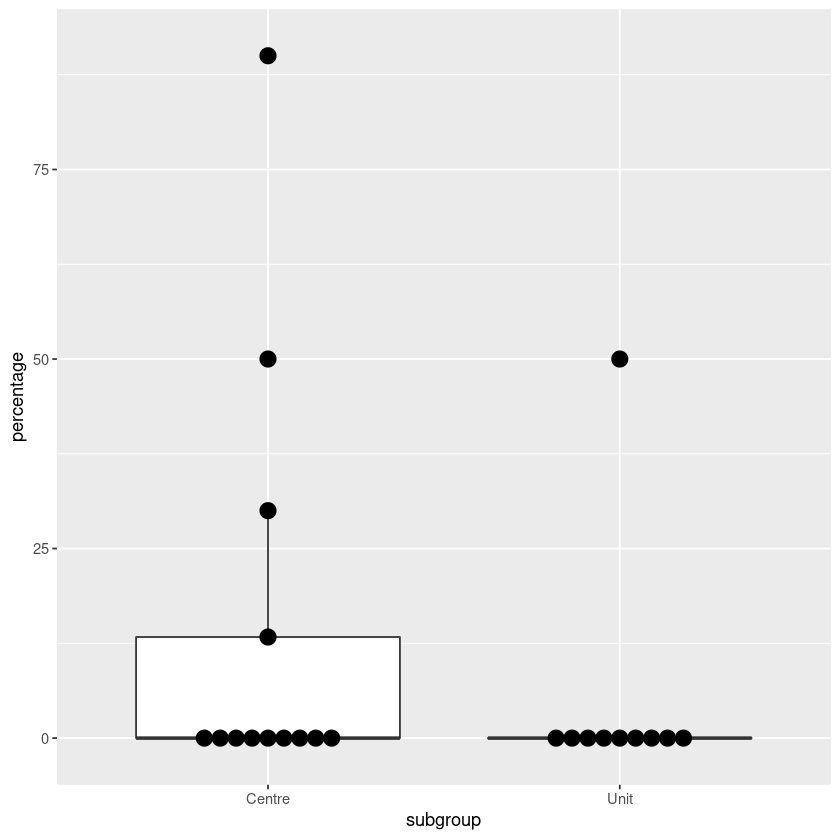

In [17]:
mysumdtaMDT$medoncred <- fn.sumpercavg(28)

stat.medoncred <- fn.summarystat(mysumdtaMDT$medoncred, mysumdtaMDT$centre2)

stat.medoncred[[1]]

print("Overall")

stat.medoncred[[2]]

print("Centre / Unit")

stat.medoncred[[3]]


### Re Clinical Oncology access/capacity, how much is this reduced by? (If not reduced enter '0', If unknown enter NK)

Warning message:
“Removed 27 rows containing non-finite values (stat_boxplot).”
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 27 rows containing non-finite values (stat_bindot).”


[1] "Overall"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   9.771   8.125 100.000      27 

[1] "Centre / Unit"


$Centre
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.00    0.00   14.88   10.00  100.00      19 

$Unit
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   3.727   0.500  30.000       8 


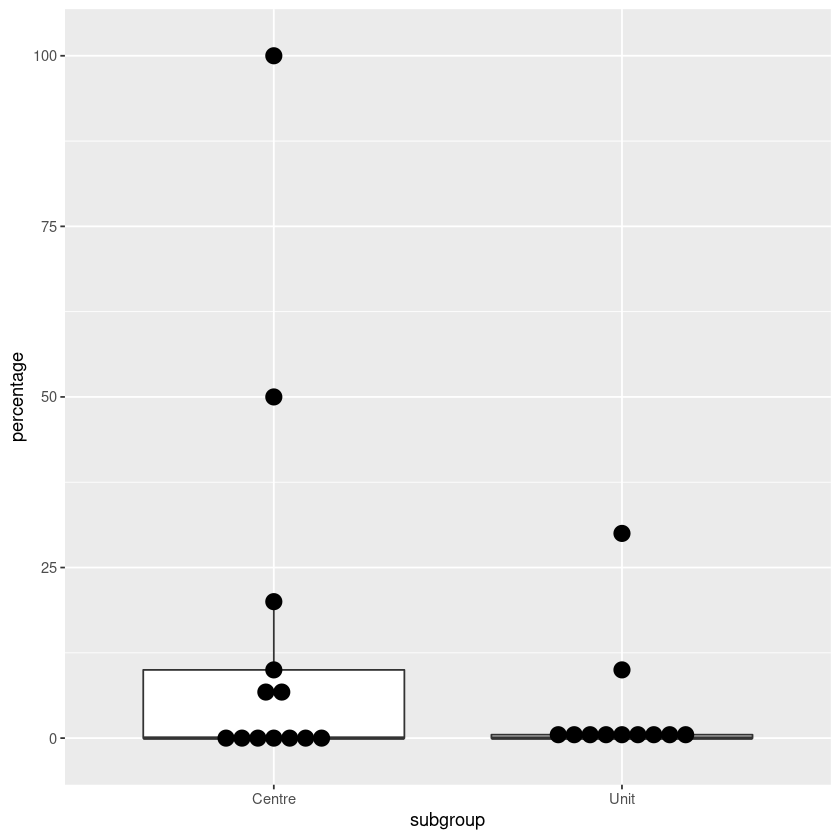

In [18]:
mysumdtaMDT$clinoncred <- fn.sumpercavg(29)

stat.clinoncred <- fn.summarystat(mysumdtaMDT$clinoncred, mysumdtaMDT$centre2)

stat.clinoncred[[1]]

print("Overall")

stat.clinoncred[[2]]

print("Centre / Unit")

stat.clinoncred[[3]]

### Re Radiology access/capacity, how much is this reduced by? (If not reduced enter '0', If unknown enter NK)

Warning message:
“Removed 19 rows containing non-finite values (stat_boxplot).”
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 19 rows containing non-finite values (stat_bindot).”


[1] "Overall"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   9.375  10.000 100.000      19 

[1] "Centre / Unit"


$Centre
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.00    0.00   14.74   17.50  100.00      13 

$Unit
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   1.538   0.000  20.000       6 


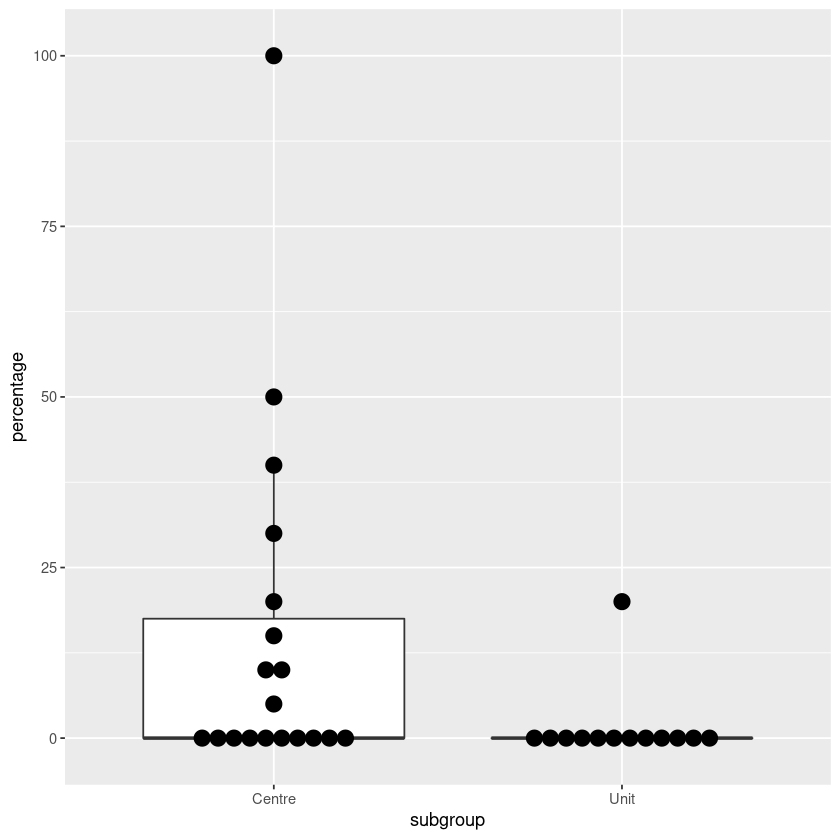

In [19]:
##                                                                                                                                                                                   
mysumdtaMDT$radiored <- fn.sumpercavg(30)

stat.radiored <- fn.summarystat(mysumdtaMDT$radiored, mysumdtaMDT$centre2)

stat.radiored[[1]]

print("Overall")

stat.radiored[[2]]

print("Centre / Unit")

stat.radiored[[3]]


### Re Pathology access/capacity, how much is this reduced by? (If not reduced enter '0', If unknown enter NK)


Warning message:
“Removed 15 rows containing non-finite values (stat_boxplot).”
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 15 rows containing non-finite values (stat_bindot).”


[1] "Overall"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   4.306   0.000 100.000      15 

[1] "Centre / Unit"


$Centre
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   5.952   0.000 100.000      11 

$Unit
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      0       0       0       2       0      30       4 


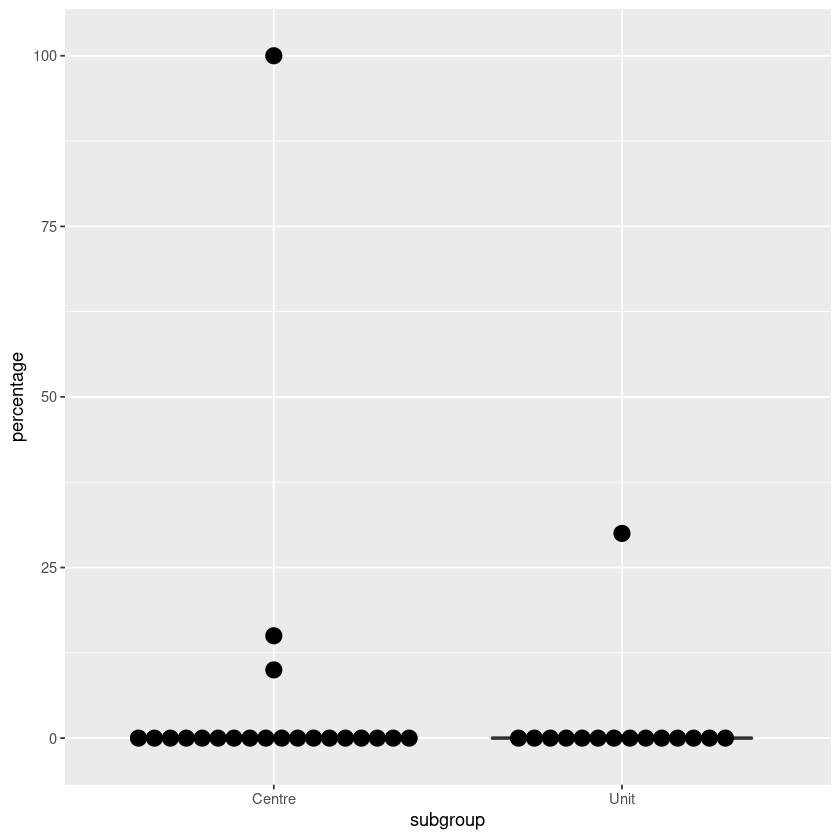

In [20]:
##                                                                                                                                                                                   
mysumdtaMDT$pathred <- fn.sumpercavg(31)

stat.pathred <- fn.summarystat(mysumdtaMDT$pathred, mysumdtaMDT$centre2)

stat.pathred[[1]]

print("Overall")

stat.pathred[[2]]

print("Centre / Unit")

stat.pathred[[3]]


### Re Palliative care access/capacity, how much is this reduced by? (If not reduced enter '0', If unknown enter NK)

Warning message:
“Removed 28 rows containing non-finite values (stat_boxplot).”
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 28 rows containing non-finite values (stat_bindot).”


[1] "Overall"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   4.348   0.000 100.000      28 

[1] "Centre / Unit"


$Centre
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   6.667   0.000 100.000      17 

$Unit
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      0       0       0       0       0       0      11 


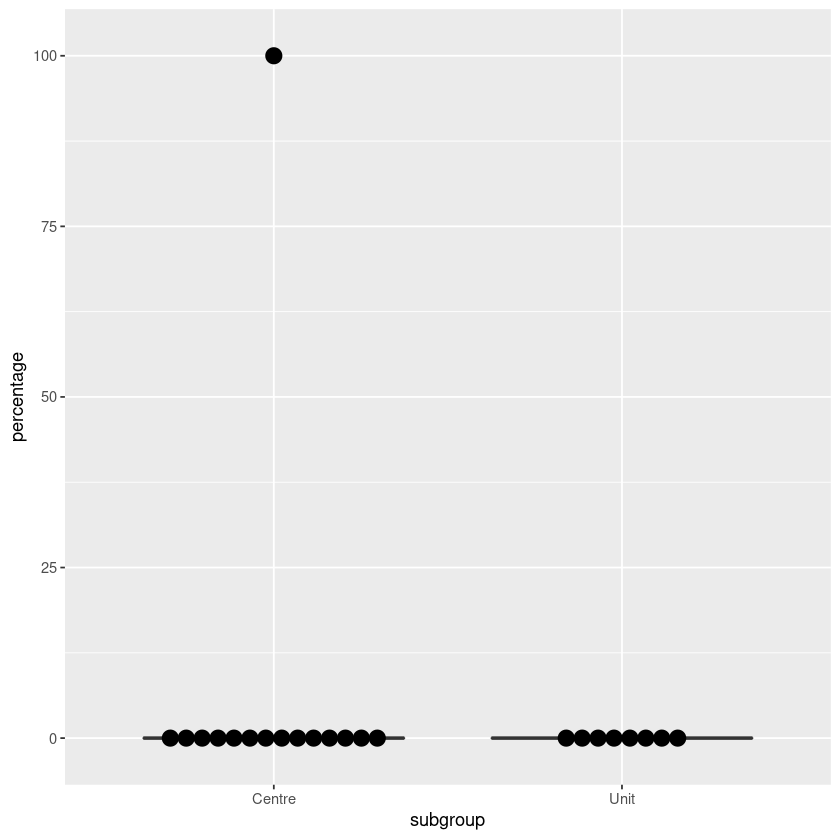

In [21]:
mysumdtaMDT$pallcapred <- fn.sumpercavg(32)

stat.pallcapred <- fn.summarystat(mysumdtaMDT$pallcapred, mysumdtaMDT$centre2)

stat.pallcapred[[1]]

print("Overall")

stat.pallcapred[[2]]

print("Centre / Unit")

stat.pallcapred[[3]]


### How much have your gynaecological oncology rapid access referrals dropped by (%)? (If not reduced enter '0')

Warning message:
“Removed 10 rows containing non-finite values (stat_boxplot).”
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 10 rows containing non-finite values (stat_bindot).”


[1] "Overall"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   25.00   50.00   46.22   70.00   80.00      10 

[1] "Centre / Unit"


$Centre
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0    30.0    50.0    48.4    70.0    80.0       7 

$Unit
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  10.00   17.50   45.00   42.81   62.50   80.00       3 


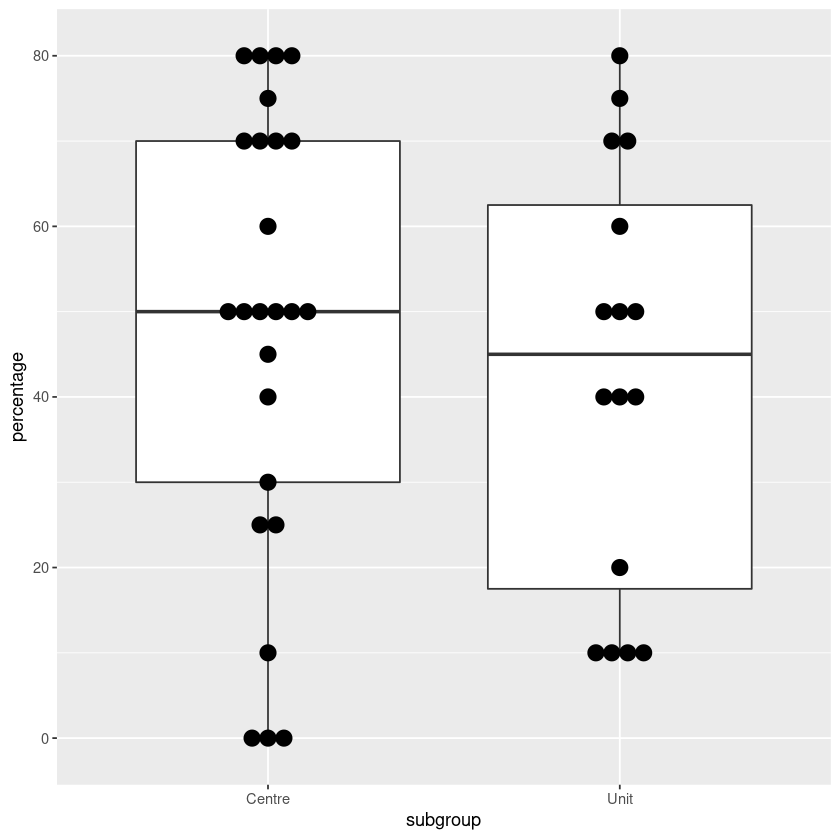

In [22]:
mysumdtaMDT$gonvrred <- fn.sumpercavg(33)

stat.gonvrred <- fn.summarystat(mysumdtaMDT$gonvrred, mysumdtaMDT$centre2)

stat.gonvrred[[1]]

print("Overall")

stat.gonvrred[[2]]

print("Centre / Unit")

stat.gonvrred[[3]]

### How much has your weekly MDT list/workload reduced by? (If not reduced enter '0')

Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 5 rows containing non-finite values (stat_bindot).”


[1] "Overall"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    2.50   22.50   25.35   47.50   80.00       5 

[1] "Centre / Unit"


$Centre
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   14.06   27.50   28.62   50.00   80.00       4 

$Unit
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.00   20.00   20.28   30.00   50.00       1 


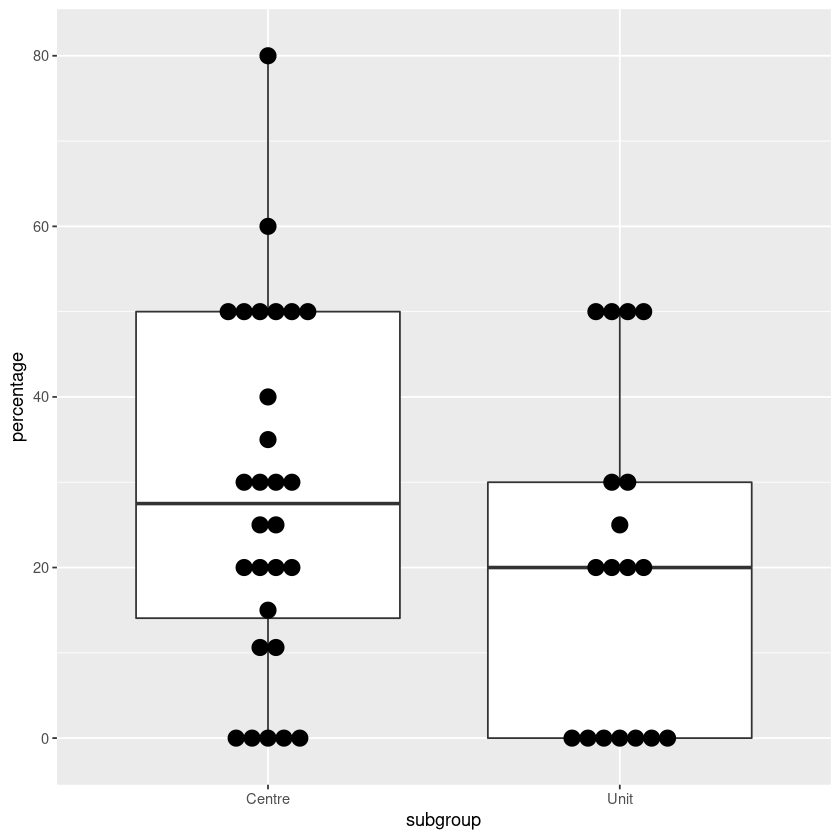

In [23]:
mysumdtaMDT$mdtworkred <- fn.sumpercavg(34)

stat.mdtworkred <- fn.summarystat(mysumdtaMDT$mdtworkred, mysumdtaMDT$centre2)

stat.mdtworkred[[1]]

print("Overall")

stat.mdtworkred[[2]]

print("Centre / Unit")

stat.mdtworkred[[3]]

### Have you needed to move activity off site to another hospital (e.g. Independent sector)

In [24]:
mysumdtaMDT$movepperlist <- tapply(mydta3$movepperlist, mydta3$newname, mean) >0.1

mysumdtaMDT$moveclinic <- tapply(mydta3$moveclinic, mydta3$newname, mean) >0.1

mysumdtaMDT$moveotheractivity <- tapply(mydta3$moveotheractivity, mydta3$newname, mean) >0.1

mysumdtaMDT$movenotyet <- tapply(mydta3$movenotyet, mydta3$newname, mean) >0.1

mysumdtaMDT$centralhub <- tapply(mydta3$centralhub, mydta3$newname, mean) >0.1

mysumdtaMDT$minaccesssurg <- tapply(mydta3$minaccesssurg, mydta3$newname, mean) >0.1

##sensitivity analysis -- do other way around (no is dominant)
##mysumdtaMDT$movepperlist <- tapply(mydta3$movepperlist, mydta3$newname, mean) ==1

##mysumdtaMDT$moveclinic <- tapply(mydta3$moveclinic, mydta3$newname, mean) ==1 

##mysumdtaMDT$moveotheractivity <- tapply(mydta3$moveotheractivity, mydta3$newname, mean) ==1 

##mysumdtaMDT$movenotyet <- tapply(mydta3$movenotyet, mydta3$newname, mean) == 1

##mysumdtaMDT$centralhub <- tapply(mydta3$centralhub, mydta3$newname, mean) == 1

##mysumdtaMDT$minaccesssurg <- tapply(mydta3$minaccesssurg, mydta3$newname, mean) ==1 


fn.sumstatMDT2 <- function(mysumdtaMDT){

    paste(fn.format(colSums(mysumdtaMDT[,19:24], na.rm=TRUE),0), "/",
          colSums(!is.na(mysumdtaMDT[,19:24])), " (",
          fn.format(colMeans(mysumdtaMDT[,19:24], na.rm=TRUE)*100,0), "%)", sep="")

}

mysumMDT.all2 <- cbind(c("Move Op list", "Move clinic", "Move other", "Not yet moved", "Central hub", "Min access surgery"), fn.sumstatMDT2(mysumdtaMDT))

##unit                                                                                                                                                                               
mysumdtaMDT2.unit <- mysumdtaMDT[mysumdtaMDT$centre==2,]

mysumMDT.unit2 <- cbind(c("Move Op list", "Move clinic", "Move other", "Not yet moved", "Central hub", "Min access surgery"), fn.sumstatMDT2(mysumdtaMDT2.unit))


##centre                                                                                                                                                                             
mysumdtaMDT2.centre <- mysumdtaMDT[mysumdtaMDT$centre==1,]

mysumMDT.centre2 <- cbind(c("Move Op list", "Move clinic", "Move other", "Not yet moved", "Central hub", "Min access surgery"), fn.sumstatMDT2(mysumdtaMDT2.centre))


mysumMDT.sum2 <- cbind(mysumMDT.all2, mysumMDT.unit2[,2], mysumMDT.centre2[,2])

colnames(mysumMDT.sum2) <- c("Type", "All", "Unit", "Centre")

mysumMDT.sum2



Type,All,Unit,Centre
Move Op list,23/41 (56%),9/19 (47%),14/22 (64%)
Move clinic,6/40 (15%),2/19 (11%),4/21 (19%)
Move other,8/38 (21%),5/18 (28%),3/20 (15%)
Not yet moved,3/29 (10%),2/16 (12%),1/13 ( 8%)
Central hub,15/39 (38%),5/18 (28%),10/21 (48%)
Min access surgery,30/41 (73%),11/19 (58%),19/22 (86%)


In [25]:
write.csv(file="output/centrelevelsummary.csv", mysumdtaMDT)

In [26]:
fn.nperc <- function(in1, in2, ndig=0){
    paste(in1, "/", in2, " (", fn.format(in1/in2*100,ndig), "%)", sep="")
}

fn.summaryyes.2 <- function(inyes1, inyes2, inperc){
    
    out1 <- paste(sum(inyes1), "/", length(inyes1), " (", fn.format(sum(inyes1)/length(inyes1)*100,0), "%)", sep="")

    out2 <- paste(sum(inyes2), "/", length(inyes2), " (", fn.format(sum(inyes2)/length(inyes2)*100,0), "%)", sep="")

    out3.i <- c(median(inperc[inyes1==1 | inyes2==1], na.rm=TRUE), quantile(inperc[inyes1==1 | inyes2==1], c(0.25, 0.75), na.rm=TRUE))

    out3 <- paste(round(out3.i[1],0), "% (", round(out3.i[2],0), "-", round(out3.i[3]), ")[", sum(is.na(inperc[inyes1==1 | inyes2==1])), "]", sep="")

    c(out1, out2, out3)

    }

tab1.redstaff <- c(table(mydta4au$centre), table(mydta4bu$centre))

t1.row1 <- c(fn.nperc(tab1.redstaff[1]+tab1.redstaff[2], sum(tab1.redstaff)),"", "",
             fn.nperc(tab1.redstaff[2], tab1.redstaff[2]+tab1.redstaff[4]), "", "",
             fn.nperc(tab1.redstaff[1], tab1.redstaff[1]+tab1.redstaff[3]),"", "")

##junior docs                                                                                                                                                                        
t1.row2 <- c(fn.summaryyes.2(mydta5a$staffJDCOVID,mydta5a$staffJDRedeploy, mydta5a$staffJDred),
fn.summaryyes.2(mydta5a1$staffJDCOVID,mydta5a1$staffJDRedeploy, mydta5a1$staffJDred), ##unit                                                                                         
fn.summaryyes.2(mydta5a0$staffJDCOVID,mydta5a0$staffJDRedeploy, mydta5a0$staffJDred)) ##centre                                                                                       

##GO subspec                                                                                                                                                                         
t1.row3 <- c(fn.summaryyes.2(mydta5a$staffGOCOVID,mydta5a$staffGORedeploy, mydta5a$staffGOred),
fn.summaryyes.2(mydta5a1$staffGOCOVID,mydta5a1$staffGORedeploy, mydta5a1$staffGOred), ##unit                                                                                         
fn.summaryyes.2(mydta5a0$staffGOCOVID,mydta5a0$staffGORedeploy, mydta5a0$staffGOred)) ##centre                                                                                       

## consultant                                                                                                                                                                        
##Const subspec                                                                                                                                                                      
t1.row4 <- c(fn.summaryyes.2(mydta5a$staffConstCOVID,mydta5a$staffConstRedeploy, mydta5a$staffCONred),
fn.summaryyes.2(mydta5a1$staffConstCOVID,mydta5a1$staffConstRedeploy, mydta5a1$staffCONred), ##unit                                                                                  
fn.summaryyes.2(mydta5a0$staffConstCOVID,mydta5a0$staffConstRedeploy, mydta5a0$staffCONred)) ##centre   

##CNS                                                                                                                                                                                
t1.row5 <- c(fn.summaryyes.2(mydta5a$staffCNSCOVID,mydta5a$staffCNSRedeploy, mydta5a$staffCNSred),
fn.summaryyes.2(mydta5a1$staffCNSCOVID,mydta5a1$staffCNSRedeploy, mydta5a1$staffCNSred), ##unit                                                                                      
fn.summaryyes.2(mydta5a0$staffCNSCOVID,mydta5a0$staffCNSRedeploy, mydta5a0$staffCNSred)) ##centre                                                                                    

t1a<-rbind(t1.row1, t1.row2, t1.row3, t1.row4, t1.row5)

t1a.labels <- c("Reduction staff", "Junior doc", "GO Sub-spec", "Consultant", "CNS")

mytab1a <- cbind(t1a.labels, t1a)
colnames(mytab1a) <- c("Item", paste(rep(c("COVID", "Redeployment", "% Reduced"),3),rep(c("(All)", "(Unit)", "(Centre)"), each=3)))

#################                                                                                                                                                                    
## MDT functioning any changes                                                                                                                                                       

mymdtchange <- tapply(as.character(mydta3$MDTchange), mydta3$newname, function(ind) mean(ind=="Yes"))

tab2.1 <- c(
    fn.nperc( table(mymdtchange), length(mymdtchange)),
    paste(table(mymdtchange, mycentre),"/", table(mycentre), " (", fn.format(c(table(mymdtchange, mycentre)) / c(table(mycentre))*100,0), "%)", sep=""))


                      
           fn.summaryyes.mdt <- function(inperc){

    out3.i <- c(median(inperc, na.rm=TRUE), quantile(inperc, c(0.25, 0.75), na.rm=TRUE), sum(is.na(inperc)))

    out3 <- paste(round(out3.i[1],0), "% (", round(out3.i[2],0), "-", round(out3.i[3]), ")[", out3.i[4], "]", sep="")

    return(out3)

    }


t2.row1 <- c("Implement change", tab2.1[1],  tab2.1[3],  tab2.1[2])

tab2.rednum <- c(" - how much less", fn.summaryyes.mdt(mysumdtaMDT$redperc[ mysumdtaMDT$lessattd]),
tapply(mysumdtaMDT$redperc[ mysumdtaMDT$lessattd], mysumdtaMDT$centre2[ mysumdtaMDT$lessattd], fn.summaryyes.mdt))      
                      
table2 <- rbind(t2.row1, mysumMDT.sum, tab2.rednum)
                      
## table 3 outpatient clinics                                                                                                                                                        

tab3.row1 <- c("Remote outpatient", c(fn.summaryyes.mdt(mysumdtaMDT$outpatientremote), tapply(mysumdtaMDT$outpatientremote, mysumdtaMDT$centre2, fn.summaryyes.mdt)))

## reduced theatre                                                                                                                                                                   
tab3.row2 <- c("Reduction theatre time", c(fn.summaryyes.mdt(mysumdtaMDT$theatrered), tapply(mysumdtaMDT$theatrered, mysumdtaMDT$centre2, fn.summaryyes.mdt)))

## surg post                                                                                                                                                                         
tab3.row3 <- c("Postponed surgery", c(fn.summaryyes.mdt(mysumdtaMDT$surgcasered), tapply(mysumdtaMDT$surgcasered, mysumdtaMDT$centre2, fn.summaryyes.mdt)))

##                                                                                                                                                                                   
tab3.row4 <- c("Med oncology ", c(fn.summaryyes.mdt(mysumdtaMDT$medoncred), tapply(mysumdtaMDT$medoncred, mysumdtaMDT$centre2, fn.summaryyes.mdt)))

##                                                                                                                                                                                   
tab3.row5 <- c("Clinical oncology ", c(fn.summaryyes.mdt(mysumdtaMDT$clinoncred), tapply(mysumdtaMDT$clinoncred, mysumdtaMDT$centre2, fn.summaryyes.mdt)))

##                                                                                                                                                                                   
tab3.row6 <- c("Radiology ", c(fn.summaryyes.mdt(mysumdtaMDT$radiored), tapply(mysumdtaMDT$radiored, mysumdtaMDT$centre2, fn.summaryyes.mdt)))

##                                                                                                                                                                                   
tab3.row7 <- c("Pathology", c(fn.summaryyes.mdt(mysumdtaMDT$pathred), tapply(mysumdtaMDT$pathred, mysumdtaMDT$centre2, fn.summaryyes.mdt)))

##                                                                                                                                                                                   
tab3.row8 <- c("Palliative care", c(fn.summaryyes.mdt(mysumdtaMDT$pallcapred), tapply(mysumdtaMDT$pallcapred, mysumdtaMDT$centre2, fn.summaryyes.mdt)))

                      #                                                                                                                                                                                   
tab3.row9 <- c("GO rapid access referrals", c(fn.summaryyes.mdt(mysumdtaMDT$gonvrred), tapply(mysumdtaMDT$gonvrred, mysumdtaMDT$centre2, fn.summaryyes.mdt)))

##                                                                                                                                                                                   
tab3.row10 <- c("Weekly MDT list", c(fn.summaryyes.mdt(mysumdtaMDT$mdtworkred), tapply(mysumdtaMDT$mdtworkred, mysumdtaMDT$centre2, fn.summaryyes.mdt)))


table3 <- rbind(tab3.row1,
                tab3.row2,
                tab3.row3,
                tab3.row4,
                tab3.row5,
                tab3.row6,
                tab3.row7,
                tab3.row8,
                tab3.row9,
                tab3.row10)


colnames(table3) <- c("Item", "Overall", "Centre", "Unit")

                      
###########                                                                                                                                                                         
## combine                                                                                                                                                                           

table2b <- rbind(c("(a) MDT functioning", "", "", ""),table2, c("Remote consulatation", table3[1,c(2,4,3)]), c("(b) Reductions", "", "",""), table3[2:10,c(1,2,4,3)],c("(c) Move activity", "", "", ""),mysumMDT.sum2)
                      
table1  <- mytab1a

write.csv(file="output/table1.csv", table1)

write.csv(file="output/table2.csv", table2b)

table1
                      
table2b
                      

,Item,COVID (All),Redeployment (All),% Reduced (All),COVID (Unit),Redeployment (Unit),% Reduced (Unit),COVID (Centre),Redeployment (Centre),% Reduced (Centre)
t1.row1,Reduction staff,25/51 (49%),,,8/19 (42%),,,17/32 (53%),,
t1.row2,Junior doc,14/25 (56%),14/25 (56%),40% (25-100)[1],5/8 (62%),4/8 (50%),30% (25-40)[1],9/17 (53%),10/17 (59%),45% (24-100)[0]
t1.row3,GO Sub-spec,2/25 (8%),6/25 (24%),100% (100-100)[0],0/8 (0%),1/8 (12%),30% (30-30)[0],2/17 (12%),5/17 (29%),100% (100-100)[0]
t1.row4,Consultant,17/25 (68%),2/25 (8%),28% (20-38)[1],6/8 (75%),0/8 (0%),30% (30-33)[1],11/17 (65%),2/17 (12%),25% (20-50)[0]
t1.row5,CNS,9/25 (36%),14/25 (56%),30% (20-50)[2],4/8 (50%),6/8 (75%),40% (20-50)[2],5/17 (29%),8/17 (47%),30% (20-50)[0]


,Type,All,Unit,Centre
,(a) MDT functioning,,,
t2.row1,Implement change,51/51 (100%),19/19 (100%),32/32 (100%)
,Virtual MDT,20/51 (39%),5/19 (26%),15/32 (47%)
,Mixed virual F2F,33/51 (65%),13/19 (68%),20/32 (62%)
,Less freq,0/51 ( 0%),0/19 ( 0%),0/32 ( 0%)
,Suspend,0/51 ( 0%),0/19 ( 0%),0/32 ( 0%)
,Less Attd,21/51 (41%),6/19 (32%),15/32 (47%)
tab2.rednum,- how much less,40% (17-50)[2],50% (16-52)[1],25% (20-40)[1]
,Remote consulatation,75% (50-88)[2],75% (50-85)[0],74% (50-87)[2]
,(b) Reductions,,,
